In [ ]:
# Import 
import re
import pandas as pd
import warnings
from pandas.errors import PerformanceWarning

# Suppress PerformanceWarnings
warnings.simplefilter(action='ignore', category=PerformanceWarning)

# Import custom libraries
import util
import responseItemNetwork
from util import UtilityFunctions as uf
from responseItemNetwork import ResponseItemNetwork as ResIN

# reload due to changes 
from importlib import reload
reload(util)   
reload(responseItemNetwork)  

# Monkey patch the method from the utility class to the pandas DataFrame
pd.DataFrame.filter_features = uf.filter_features
pd.DataFrame.filter_numerical_values = uf.filter_numerical_values
pd.DataFrame.filter_negative_values = uf.filter_negative_values
pd.DataFrame.filter_columns_with_less_unique_values_than_threshold = uf.filter_columns_with_less_unique_values_than_threshold
pd.DataFrame.drop_columns = uf.drop_columns

In [ ]:
path = './../data/processed/'
processed_files = sorted(uf.get_csv_files_from_folder(path))

In [ ]:
pattern = r"^.*\/WV\d+_USA\.csv$"
# Use a list comprehension to filter the strings
files_to_load = [file for file in processed_files if re.match(pattern, file)]

print(files_to_load)

['./../data/processed/WV3_USA.csv', './../data/processed/WV4_USA.csv', './../data/processed/WV5_USA.csv', './../data/processed/WV6_USA.csv', './../data/processed/WV7_USA.csv']


In [ ]:
import pandas as pd

df = pd.DataFrame()

# Iterate over all files in processed_files and check for matches with files_to_load
for f in processed_files:
    for file_to_match in files_to_load:  
        if file_to_match in f:  # Check if the current file matches any in files_to_load
            print(f"Processing file: {f}")
            df_new_set = pd.read_csv(f)
            df = pd.concat([df, df_new_set], ignore_index=True)


Processing file: ./../data/processed/WV3_USA.csv
Processing file: ./../data/processed/WV4_USA.csv
Processing file: ./../data/processed/WV5_USA.csv
Processing file: ./../data/processed/WV6_USA.csv
Processing file: ./../data/processed/WV7_USA.csv


In [ ]:
NUMBER_OF_QUESTIONS =  10 #len(question_mapping)

question_mapping_wvs_7 = {}

questions_wvs_7 = list(question_mapping_wvs_7.keys())[:NUMBER_OF_QUESTIONS]
df_filtered_wvs_7 = df.filter_features(questions_wvs_7 + [''])

question_mapping_filtered_wvs_7 = {key: question_mapping_wvs_7[key] for key in questions_wvs_7}
print(df_filtered_wvs_7.columns)

In [ ]:
question_mapping_wvs_6 = {
    'V109': ('Confidence_Armed_Forces', 4, False),
    'V203': ('Justifiable_Homosexuality', 10, False),
                          }
political_belief_feature_wvs_6 = 'V95'

questions_wvs_6 = list(question_mapping_wvs_6.keys())[:NUMBER_OF_QUESTIONS]
df_filtered_wvs_6 = df.filter_features(questions_wvs_6 + [political_belief_feature_wvs_6])

question_mapping_filtered_wvs_6 = {key: question_mapping_wvs_6[key] for key in questions_wvs_6}
print(df_filtered_wvs_6.columns)

array = [(df_filtered_wvs_6, question_mapping_filtered_wvs_6, political_belief_feature_wvs_6)]

Index(['V109', 'V203', 'V95'], dtype='object')


question_mapping_wvs_5 =  {}

questions_wvs_5 = list(question_mapping_wvs_5.keys())[:NUMBER_OF_QUESTIONS]
df_filtered_wvs_5 = df.filter_features(questions_wvs_5 + [''])

question_mapping_filtered_wvs_5 = {key: question_mapping_wvs_5[key] for key in questions_wvs_5}
print(df_filtered_wvs_5.columns)

question_mapping_wvs_4 =  {}

questions_wvs_4 = list(question_mapping_wvs_4.keys())[:NUMBER_OF_QUESTIONS]
df_filtered_wvs_4 = df.filter_features(questions_wvs_4 + [''])

question_mapping_filtered_wvs_4 = {key: question_mapping_wvs_4[key] for key in questions_wvs_4}
print(df_filtered_wvs_4.columns)

question_mapping_wvs_3 =  {}

questions_wvs_3 = list(question_mapping_wvs_3.keys())[:NUMBER_OF_QUESTIONS]
df_filtered_wvs_3 = df.filter_features(questions_wvs_3 + [''])

question_mapping_filtered_wvs_3 = {key: question_mapping_wvs_3[key] for key in questions_wvs_3}
print(df_filtered_wvs_3.columns)

Linearization Score Before rotation: 1.6795029361475458


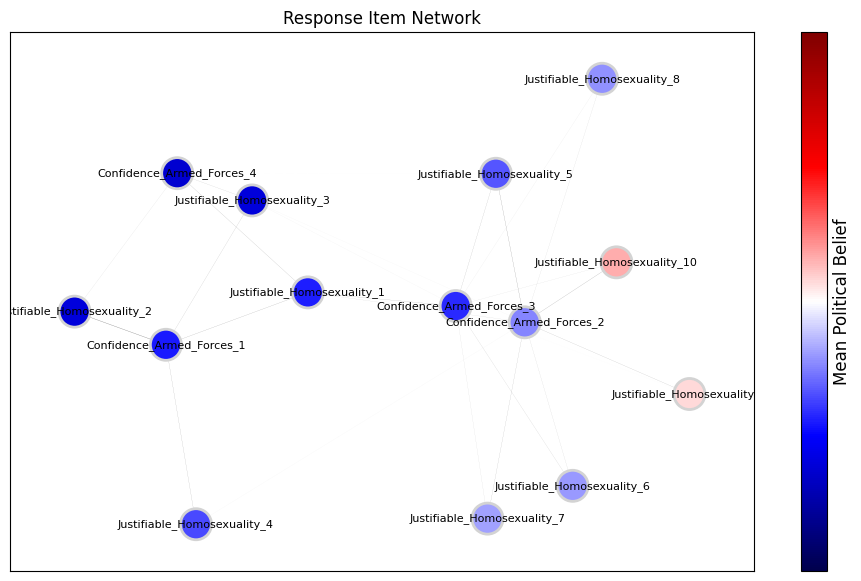

(6049, 15)
Index(['resin_political_beliefs', 'Confidence_Armed_Forces_1',
       'Confidence_Armed_Forces_2', 'Confidence_Armed_Forces_3',
       'Confidence_Armed_Forces_4', 'Justifiable_Homosexuality_1',
       'Justifiable_Homosexuality_2', 'Justifiable_Homosexuality_3',
       'Justifiable_Homosexuality_4', 'Justifiable_Homosexuality_5',
       'Justifiable_Homosexuality_6', 'Justifiable_Homosexuality_7',
       'Justifiable_Homosexuality_8', 'Justifiable_Homosexuality_9',
       'Justifiable_Homosexuality_10'],
      dtype='object')


In [ ]:
for df, question_mapping, political_belief_feature in array:
    resin = ResIN(df, question_mapping, political_belief_feature)
    resin.visualize_graph(True) # False to not show the node labels in graph 
    print(resin.df.shape)
    print(resin.df.columns)